# zero-to-gans-02-images



In [ ]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [ ]:
dataset = MNIST(root='data/', download=True)
test_dataset = MNIST(root='data/', train=False)
import matplotlib.pyplot as plt
%matplotlib inline

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



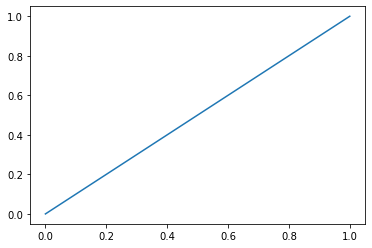

In [ ]:
plt.plot([0,1], [0,1])

Label: 2


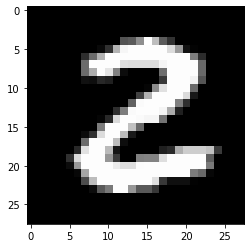

In [ ]:
image, label = dataset[25]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [ ]:
import torchvision.transforms as transforms
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [ ]:
img_tensor, label = dataset[25]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 2


img_tensor, label = dataset[10]
print(img_tensor.shape, label)

In [ ]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2549],
        [0.0000, 0.0000, 0.0000, 0.3804, 0.9804],
        [0.0000, 0.1804, 0.4902, 0.9804, 0.9922],
        [0.1608, 0.8510, 0.9922, 0.9922, 0.9804]])
tensor(1.) tensor(0.)


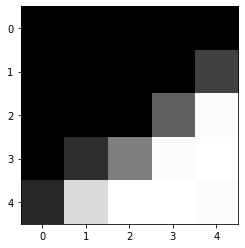

In [ ]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

In [ ]:
from torch.utils.data import random_split
train_ds, val_ds = random_split(dataset, [50000, 10000])

In [ ]:
from torch.utils.data import DataLoader
batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [ ]:
import torch.nn as nn

In [ ]:
input_size = 28*28
num_classes = 10

In [ ]:
model = nn.Linear(input_size, num_classes)

In [ ]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0313, -0.0212,  0.0226,  ...,  0.0332,  0.0166,  0.0026],
        [-0.0290,  0.0095,  0.0355,  ..., -0.0214,  0.0256, -0.0238],
        [ 0.0194,  0.0274, -0.0042,  ..., -0.0150, -0.0314,  0.0273],
        ...,
        [ 0.0028, -0.0126,  0.0131,  ..., -0.0270,  0.0118, -0.0056],
        [-0.0040, -0.0226, -0.0157,  ..., -0.0186,  0.0159, -0.0277],
        [-0.0287,  0.0196,  0.0166,  ..., -0.0315, -0.0103,  0.0342]],
       requires_grad=True)

In [ ]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([8, 3, 9, 1, 9, 3, 4, 9, 5, 6, 3, 8, 7, 8, 1, 9, 3, 9, 4, 1, 7, 0, 1, 5,
        1, 7, 8, 6, 3, 0, 9, 5, 6, 5, 5, 6, 8, 3, 6, 6, 2, 7, 7, 1, 0, 8, 9, 1,
        8, 0, 3, 3, 3, 4, 1, 9, 1, 1, 1, 2, 0, 3, 0, 5, 7, 2, 7, 6, 9, 4, 0, 7,
        0, 7, 8, 9, 5, 8, 2, 7, 9, 7, 4, 2, 8, 3, 0, 0, 7, 0, 5, 3, 7, 4, 2, 2,
        3, 2, 2, 4, 5, 1, 5, 7, 9, 2, 1, 3, 0, 1, 7, 2, 3, 5, 7, 6, 1, 5, 1, 0,
        4, 1, 1, 4, 1, 8, 7, 1])
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

In [ ]:
images.shape

torch.Size([128, 1, 28, 28])

In [ ]:
images.reshape(128, 784).shape

torch.Size([128, 784])

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [ ]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0044,  0.0295, -0.0030,  ..., -0.0288,  0.0237,  0.0016],
         [-0.0217,  0.0190,  0.0053,  ..., -0.0152,  0.0211, -0.0198],
         [-0.0339,  0.0046, -0.0022,  ..., -0.0168,  0.0078,  0.0275],
         ...,
         [ 0.0153, -0.0278, -0.0325,  ..., -0.0268, -0.0328, -0.0228],
         [ 0.0034,  0.0009, -0.0225,  ...,  0.0246,  0.0184,  0.0303],
         [ 0.0224,  0.0098,  0.0235,  ...,  0.0273,  0.0314,  0.0109]],
        requires_grad=True), Parameter containing:
 tensor([-0.0073, -0.0049, -0.0154,  0.0236,  0.0007,  0.0057, -0.0349,  0.0291,
         -0.0050, -0.0062], requires_grad=True)]

In [ ]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.0732, -0.0235, -0.0761,  0.0498,  0.0500, -0.0056,  0.5369, -0.0853,
         -0.1582, -0.0584],
        [-0.0141, -0.0724,  0.1439, -0.0385,  0.0478, -0.0779,  0.0627, -0.0640,
         -0.1703,  0.0066]])


In [ ]:
import torch.nn.functional as F

In [ ]:
probs = F.softmax(outputs, dim=1)
print("Sample probabilities:\n", probs[:2].data)
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1025, 0.0930, 0.0882, 0.1001, 0.1001, 0.0947, 0.1629, 0.0874, 0.0813,
         0.0898],
        [0.1000, 0.0943, 0.1171, 0.0976, 0.1064, 0.0938, 0.1080, 0.0951, 0.0855,
         0.1021]])
Sum:  1.0


In [ ]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([6, 2, 6, 6, 0, 6, 3, 1, 1, 6, 6, 1, 0, 6, 4, 1, 3, 6, 6, 3, 1, 6, 6, 3,
        6, 6, 0, 4, 0, 6, 9, 6, 4, 3, 5, 3, 9, 6, 7, 6, 6, 6, 6, 6, 7, 4, 6, 4,
        1, 2, 0, 4, 6, 4, 3, 6, 4, 6, 1, 4, 4, 3, 1, 3, 4, 6, 6, 6, 0, 3, 3, 6,
        7, 4, 4, 2, 6, 6, 7, 7, 2, 4, 6, 6, 6, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        3, 6, 6, 6, 4, 6, 6, 6, 4, 6, 4, 6, 6, 4, 0, 6, 0, 6, 3, 6, 6, 3, 6, 0,
        0, 4, 7, 7, 6, 0, 3, 7])
tensor([0.1629, 0.1171, 0.1319, 0.1264, 0.1257, 0.1213, 0.1315, 0.1181, 0.1154,
        0.1501, 0.1278, 0.1237, 0.1388, 0.1211, 0.1254, 0.1305, 0.1208, 0.1185,
        0.1248, 0.1183, 0.1278, 0.1299, 0.1218, 0.1185, 0.1303, 0.1123, 0.1198,
        0.1150, 0.1255, 0.1310, 0.1222, 0.1217, 0.1394, 0.1173, 0.1252, 0.1407,
        0.1139, 0.1181, 0.1395, 0.1287, 0.1443, 0.1414, 0.1225, 0.1252, 0.1151,
        0.1197, 0.1210, 0.1277, 0.1222, 0.1172, 0.1297, 0.1133, 0.1335, 0.1263,
        0.1272, 0.1360, 0.1330, 0.1545, 0.1166, 0.1240, 0.1246, 0.1206, 0.1334,
       

In [ ]:
def accuracy( outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds == labels).item()/len(preds))

In [ ]:
accuracy(outputs, labels)

tensor(0.0625)

In [ ]:
probs

tensor([[0.0969, 0.1215, 0.0826,  ..., 0.0981, 0.1043, 0.0915],
        [0.0755, 0.1271, 0.0882,  ..., 0.1049, 0.0871, 0.0821],
        [0.0894, 0.1175, 0.0847,  ..., 0.0975, 0.1025, 0.0885],
        ...,
        [0.0982, 0.1292, 0.0738,  ..., 0.1175, 0.0847, 0.0963],
        [0.0757, 0.1014, 0.0821,  ..., 0.1203, 0.1147, 0.0819],
        [0.0743, 0.1031, 0.0982,  ..., 0.0996, 0.0966, 0.0952]],
       grad_fn=<SoftmaxBackward0>)

In [ ]:
loss_fn = F.cross_entropy

In [ ]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2759, grad_fn=<NllLossBackward0>)


In [ ]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [ ]:
result0 = (evaluate(model, val_loader))
result0

{'val_loss': 2.336233377456665, 'val_acc': 0.12470332533121109}

In [ ]:
history1 = fit(5, 0.001, model, train_loader, val_loader)
history1

Epoch [0], val_loss: 1.9566, val_acc: 0.6168
Epoch [1], val_loss: 1.6844, val_acc: 0.7341
Epoch [2], val_loss: 1.4816, val_acc: 0.7672
Epoch [3], val_loss: 1.3285, val_acc: 0.7852
Epoch [4], val_loss: 1.2108, val_acc: 0.7966


[{'val_loss': 1.9566138982772827, 'val_acc': 0.6167919039726257},
 {'val_loss': 1.6843810081481934, 'val_acc': 0.7340783476829529},
 {'val_loss': 1.481555461883545, 'val_acc': 0.7672072649002075},
 {'val_loss': 1.3284631967544556, 'val_acc': 0.7852057218551636},
 {'val_loss': 1.2107617855072021, 'val_acc': 0.7965783476829529}]

In [ ]:
history1 = fit(5, 0.001, model, train_loader, val_loader)
history1

Epoch [0], val_loss: 1.1184, val_acc: 0.8058
Epoch [1], val_loss: 1.0443, val_acc: 0.8125
Epoch [2], val_loss: 0.9838, val_acc: 0.8193
Epoch [3], val_loss: 0.9334, val_acc: 0.8243
Epoch [4], val_loss: 0.8909, val_acc: 0.8280


[{'val_loss': 1.1183671951293945, 'val_acc': 0.8057753443717957},
 {'val_loss': 1.044297218322754, 'val_acc': 0.8125},
 {'val_loss': 0.9837528467178345, 'val_acc': 0.8193235993385315},
 {'val_loss': 0.9334232807159424, 'val_acc': 0.8242682218551636},
 {'val_loss': 0.890907883644104, 'val_acc': 0.8280261158943176}]

In [ ]:
history1 = fit(5, 0.001, model, train_loader, val_loader)
history1

Epoch [0], val_loss: 0.8545, val_acc: 0.8315
Epoch [1], val_loss: 0.8230, val_acc: 0.8357
Epoch [2], val_loss: 0.7954, val_acc: 0.8396
Epoch [3], val_loss: 0.7710, val_acc: 0.8427
Epoch [4], val_loss: 0.7493, val_acc: 0.8451


[{'val_loss': 0.854493260383606, 'val_acc': 0.8314873576164246},
 {'val_loss': 0.8229677081108093, 'val_acc': 0.8357397317886353},
 {'val_loss': 0.7953793406486511, 'val_acc': 0.8395965099334717},
 {'val_loss': 0.771012008190155, 'val_acc': 0.8426621556282043},
 {'val_loss': 0.7493178844451904, 'val_acc': 0.8451344966888428}]

In [ ]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

img, label = test_dataset[8]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [ ]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 6 , Predicted: 6


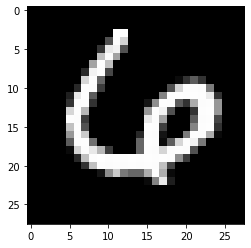

In [ ]:
img, label = test_dataset[1450]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.7203377485275269, 'val_acc': 0.8515625}

In [ ]:
torch.save(model.state_dict(), 'mnist-logistic.pth')